# ROC Analysis Assignment
### Bianca Caissotti di Chiusano

In [46]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from numpy import trapz
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [24]:
# Probabilistic classifier h has been first trained on some labeled training data and tested on test instances
# For each test instance x, classifier h outputs posterior probability of positive and negative class 

In the ROC class there is the function compute_ROC_coordinates

This method first sorts the probabilities of predicting "tested_positive" for each test instance x in descending order.

With a for loop it is continuously updating a threshold t (like in the example in the slides), which starts from the greatest probability in the sorted probs until the lowest. 
For every threshold t, test instance with a probability above t we say should actually be tested_positive and everything below should be tested_negative. This is done in the code through the use of a variable called "truth".
Once the threshold is set, we use another for loop to reiterate among all the test instances from the beginning.

We check the trueClass to the the actual output if it is tested_positive or tested_negative.
For a test instance, if trueClass says tested_positive and the predicted probability in probs for that test instance is above the threshold t, then truth is also tested_positive and we add 1 to the True Positive (tp) counter.
Same reasoning but with trueClass saying tested_negative, then we add 1 to the False Positive (fp) counter.
We calculate the rates by dividing TP/P and FP/N and add to the coordinates.

In [52]:
class ROC():
    # parametric constructor accepts Probs(estimated probs of the test instance for pos) and  TrueClass (true class of the test instances)
    def __init__(self, probs, trueClass):
        self.probs = probs
        self.trueClass = trueClass
        
    def compute_ROC_coordinates(self, probs, trueClass):
        # get pos class probs and true class 
        # compute TPr and FPr coordinates
        
        # Sort the test instances into decreasing order of the probibility 
        probs = probs.sort_values(ascending = False)
        trueClass = trueClass.reindex(probs.index)
        
        FPr = []
        TPr = []

        truth = False
        count= trueClass.value_counts()
        
        # In the beginning everything is either Fnegative or Tnegative
        coordinates.append([0, 0])
        
        # For each consecutive instance x in probs 
        # Set the threshold value t equal to the probability Ppos of x and compute TPr and FPr of the discrete classifier ht
        for i in range(len(probs)):
            tp = 0
            fp = 0
            t = probs.iloc[i]
            # under t its negative, above t is positive 
            for j in range(len(probs)):
                if(probs.iloc[j] < t):
                    truth = "tested_negative"
                else:
                    truth = "tested_positive"
                if(trueClass.iloc[j]['class'] == "tested_positive" and truth == "tested_positive"):
                    tp = tp + 1
                else:
                    if(trueClass.iloc[j]['class'] == "tested_negative" and truth == "tested_positive"):
                        fp = fp + 1
            FPr.append(fp/count["tested_negative"])
            TPr.append(tp/count["tested_positive"])
                  
        return TPr, FPr
    
    def plot_ROC(self, TPr, FPr):
        plt.plot(FPr,TPr)
        plt.xlabel('fpr')
        plt.ylabel('tpr')
    
    def compute_AUCROC(self, TPr, FPr):
        area = metrics.auc(FPr, TPr)
        return area
        

In [30]:
# Probabilistic classifier KNN with the diabetes dataset 
data = pd.read_csv("diabetes.csv")
data.head()
Y = data['class']
X = data.drop(['class'],axis=1)
data

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,tested_negative
764,2,122,70,27,0,36.8,0.340,27,tested_negative
765,5,121,72,23,112,26.2,0.245,30,tested_negative
766,1,126,60,0,0,30.1,0.349,47,tested_positive


Splitting the diabetes data set into training and testing data.
Using the KNN classifiers with 3-nearest neighbors 

We define the true class to be the actual output that we know is correct from the data set.

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.34, random_state=10)
classify = KNeighborsClassifier(n_neighbors=3)
classify.fit(X_train, Y_train)

trueClass = pd.DataFrame(Y_test).reset_index(drop=True)
trueClass

,class
0,tested_negative
1,tested_negative
2,tested_negative
3,tested_positive
4,tested_negative
...,...
257,tested_negative
258,tested_positive
259,tested_positive
260,tested_negative


Instead, probs is the prediction probabilities of input test data using the classifier 

In [32]:
probs = pd.DataFrame(classify.predict_proba(X_test))
probs

,0,1
0,0.000000,1.000000
1,0.666667,0.333333
2,0.333333,0.666667
3,1.000000,0.000000
4,0.333333,0.666667
...,...,...
257,1.000000,0.000000
258,0.000000,1.000000
259,0.000000,1.000000
260,1.000000,0.000000


We can have a look at these probabilities 

In [33]:
probs = probs.iloc[:,1] # predicted probabilities of tested positive
probs

0      1.000000
1      0.333333
2      0.666667
3      0.000000
4      0.666667
         ...   
257    0.000000
258    1.000000
259    1.000000
260    0.000000
261    0.000000
Name: 1, Length: 262, dtype: float64

Calling the ROC class and passing as parameters probs and trueClass 
We then call the method to compute the coordinate that is going to return an X (FPr) and Y(TPr) to plot the ROC curve

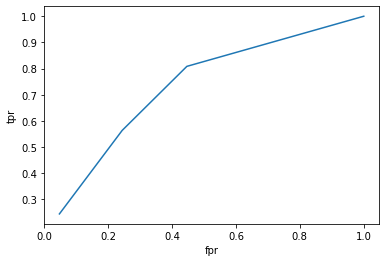

In [53]:
roc = ROC(probs, trueClass)
TPr, FPr = roc.compute_ROC_coordinates(probs, trueClass)
roc.plot_ROC(TPr, FPr)

In [54]:
roc.compute_AUCROC(TPr, FPr)

0.7188449848024316

Overall ROC is used to understand and analyse the performance of the classifier (in this case the KNN classifier).
The area under the curve (AUC) indicates the separation of the classes.
According to the readings "no realistic classifier should have an AUC less then 0.5". Already from our result we can see that the KNN classifier performed well. 
A high area means that there is good separation of the classes, thus better performance.
From our area result, we have a pretty good separation of classes with our classifier.